In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [39]:
from kneed import KneeLocator

In [4]:
dataset = pd.read_csv('dataset_100_instances.csv')

In [5]:
X = dataset.values

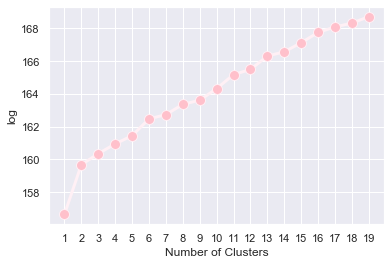

In [45]:
i = 1
L1=[]
L2=[]
while i < 20:
    gmm = GaussianMixture(n_init=10, init_params='random', n_components=i).fit(X)
    L1.append(i)
    L2.append(gmm.lower_bound_)
    i+=1

plt.plot(L1, L2, marker='o', markerfacecolor='pink', markersize=10, color='lavenderblush', linewidth=3)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("log")
plt.show()

In [46]:
kl = KneeLocator(
    L1, L2, curve="concave", direction="increasing"
)

kl.elbow

6

In [47]:
gmm = GaussianMixture(n_init=10, init_params='random', n_components=6).fit(X)

In [48]:
gmm.lower_bound_

162.1625514216297

In [49]:
probs = gmm.predict_proba(X)
print(probs.round(3))

[[0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.    0.    0.    1.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.   ]
 [0.004 0.    0.    0.996 0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.   

In [62]:
pred = gmm.predict(X)
print(probs.round(3))

[3 3 5 5 2 2 2 2 4 4 2 2 0 3 3 3 3 0 0 0 2 2 2 2 4 4 4 4 4 4 4 4 4 4 2 2 3
 3 3 3 1 1 1 1 2 2 2 2 2 2 2 4 1 1 1 3 5 5 1 1 0 0 0 3 0 3 0 0 5 5 3 3 1 1
 1 1 2 2 2 2 2 2 2 2 2 4 4 4 2 4 4 4 1 1 1 1 1 1 3 3]


In [61]:
df = dataset

In [63]:
df['cluster'] = pred

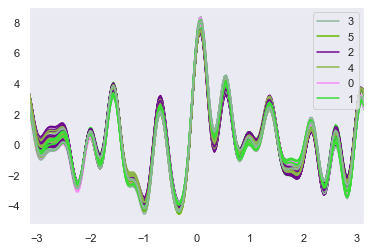

In [64]:
pd.plotting.andrews_curves(df, 'cluster')

In [51]:
gmm.n_iter_

12

In [52]:
gmm.means_

array([[0.12343171, 0.59768735, 0.76736753, 1.        , 0.666667  ,
        0.69538848, 0.38980665, 0.38551295, 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.18286036, 0.49079399, 0.65138813, 1.        , 0.666667  ,
        0.55971505, 0.38179265, 0.32309857, 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.25484579, 0.33734094, 0.52463357, 1.        , 0.666667  ,
        0.59506171, 0.00567586, 0.16874401, 1.        , 0.        ,
      

In [53]:
gmm.covariances_.round(4)

array([[[ 0.0005,  0.0001,  0.001 , ...,  0.    ,  0.    ,  0.    ],
        [ 0.0001,  0.0028,  0.0024, ...,  0.    ,  0.    ,  0.    ],
        [ 0.001 ,  0.0024,  0.0057, ...,  0.    ,  0.    ,  0.    ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]],

       [[ 0.0014, -0.002 , -0.0025, ...,  0.    ,  0.    ,  0.    ],
        [-0.002 ,  0.0041,  0.0042, ...,  0.    ,  0.    ,  0.    ],
        [-0.0025,  0.0042,  0.0048, ...,  0.    ,  0.    ,  0.    ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.0005,  0.0005, ...,  0.    , -0.    ,  0.    ],
    

In [54]:
gmm.precisions_.round(4)

array([[[ 7.87590120e+03,  1.35616900e+03, -1.87886070e+03, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [ 1.35616900e+03,  1.25130030e+03, -9.15972300e+02, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-1.87886070e+03, -9.15972300e+02,  1.00898000e+03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.00000000e+06,  0.00000000e+00,  0.00000000e+00],
        [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  1.00000000e+06,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+06]],

       [[ 2.38198290e+04, -9.09290000e+02,  2.17685400e+02, ...,
          0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
        [-9.09290000e+02,  8.58837240e+03, -1.45649914e+04, ...,
          0.00000000e+00,  0.00000000e

In [55]:
gmm.converged_

True